# Gradient descent with learning rate scheduling

## Needed Libraries import

In [40]:
from helpers import *
from scipy.optimize import OptimizeResult

## Gradient Descent implementations with different schedules

### General gradient descent implementation

In [41]:
def gd_lrs(f, grad_f, x0, learning_rate_schedule, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)

    nit = 0
    x_history = [x.copy()]

    for nit in range(max_iter):
        lr = learning_rate_schedule(nit)
        grad = grad_f(x)
        x -= lr * grad

        x_history.append(x.copy())

        if np.linalg.norm(grad) < tol:
            break

    return OptimizeResult(x=x, fun=f(x), nit=nit + 1, nfev=nit + 1, x_history=np.array(x_history))

### Step Decay

In [42]:
def step_decay(init, drop_rate, step_size, nit):
    return init * (drop_rate ** (nit // step_size))

### Exponential Decay

In [43]:
def exponential_decay(init, decay_rate, nit):
    return init * np.exp(-decay_rate * nit)

### Cosine Annealing

In [44]:
def cosine_annealing(init, nit, lr_max, eta_min=0):
    return eta_min + (init - eta_min) * (1 + np.cos(np.pi * nit / lr_max)) / 2

### List of modes for generalization

In [45]:
decay_modes = [(lambda k: step_decay(0.1, 0.5, 10, k), "GD step decay"),
               (lambda k: exponential_decay(0.1, 0.01, k), "GD exponential decay"),
               (lambda k: cosine_annealing(0.1, k, 100, eta_min=0.01), "GD cosine annealing")]

### Extraction for reuse

In [46]:
# !jupyter nbconvert --to python GD_LRS.ipynb

## Results

### Symmetrical parabola: $(x - 3)^2 + (y + 2)^2$

### Step decay

Method: GD step decay
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (2.892, -1.932)       0.016         1000          1000       0.127724  


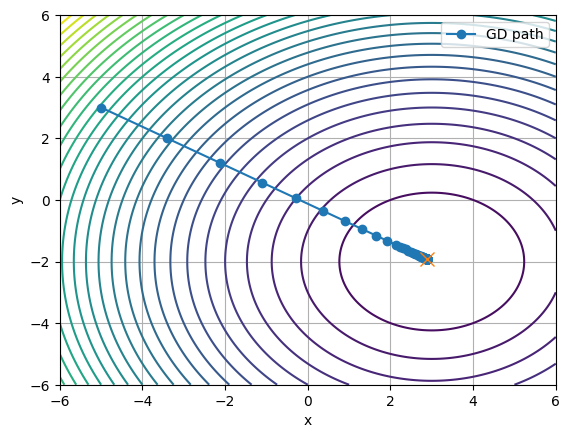

Method: GD exponential decay
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -2.000)       0.000         153           153        0.000000  


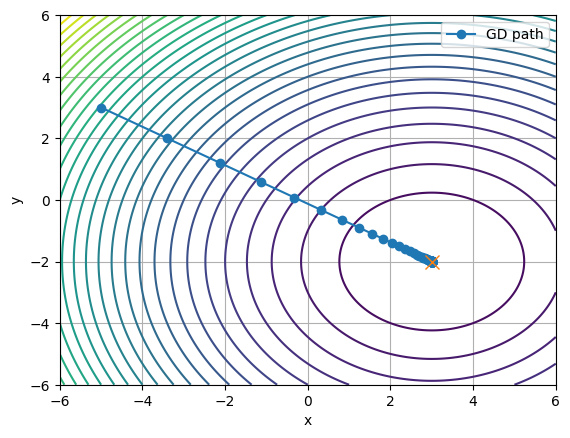

Method: GD cosine annealing
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -2.000)       0.000         166           166        0.000000  


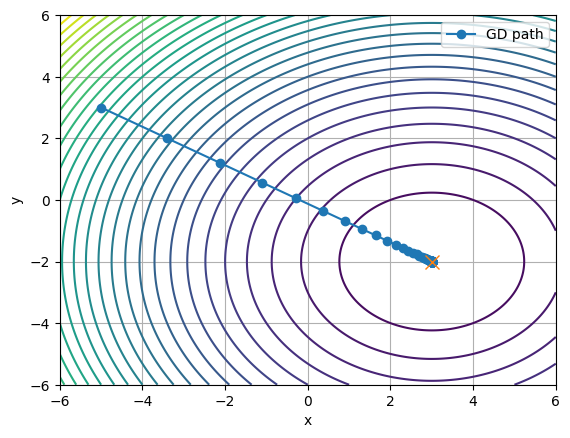

In [47]:
for decay in decay_modes:
    print_output([-5, 3],
                 lambda *args, **kwargs: gd_lrs(*args, learning_rate_schedule=decay[0], **kwargs),
                 func_sp,
                 grad_sp,
                 [3, -2],
                 decay[1])

### Rotated elliptical function: $2(x + 2)^2 + 4xy + 3(y - 4)^2$

Method: GD step decay
Initial point: [-3, -25]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-13.210, 12.260)       -191.805      1000          1000       6.077620  


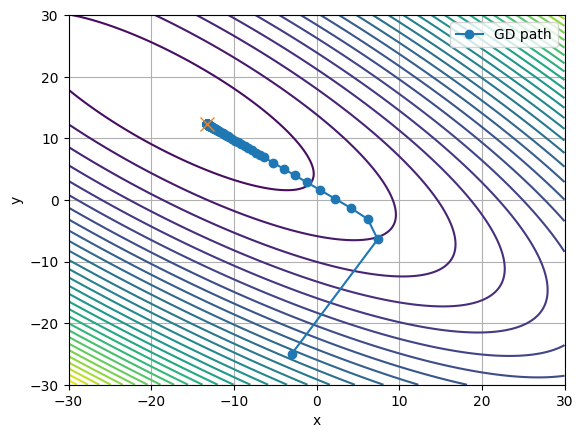

Method: GD exponential decay
Initial point: [-3, -25]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-17.996, 15.997)       -208.000      1000          1000       0.004507  


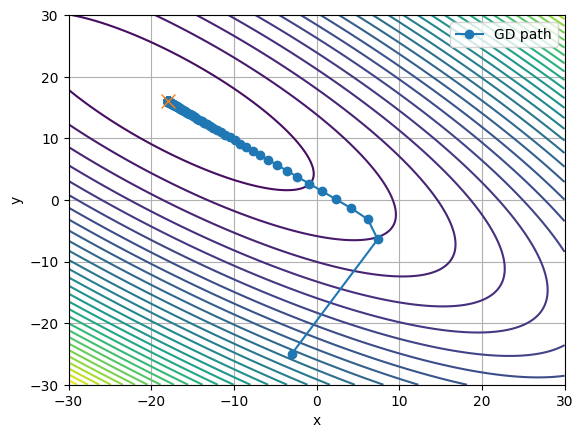

Method: GD cosine annealing
Initial point: [-3, -25]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      370           370        0.000001  


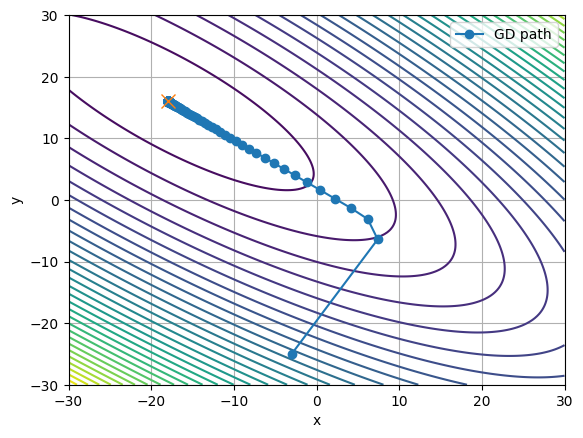

In [48]:
for decay in decay_modes:
    print_output([-3, -25],
                 lambda *args, **kwargs: gd_lrs(*args, learning_rate_schedule=decay[0], **kwargs),
                 func_re,
                 grad_re,
                 [-18, 16],
                 decay[1],
                 [-30, 30])

### Elliptical function with scale: $8(x - 3)^2 + (y + 1)^2$

### Step decay

Method: GD step decay
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -0.946)       0.003         1000          1000       1.054155  


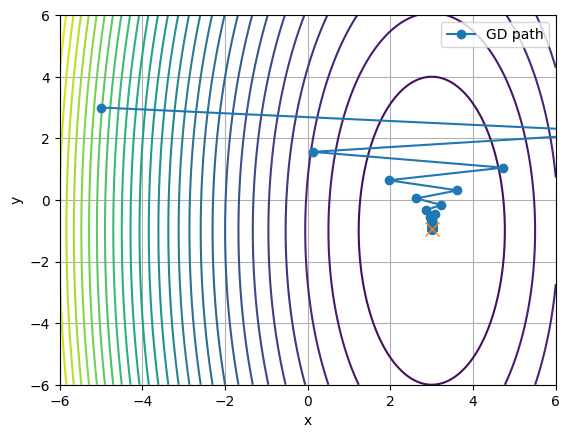

Method: GD exponential decay
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -1.000)       0.000         136           136        1.000000  


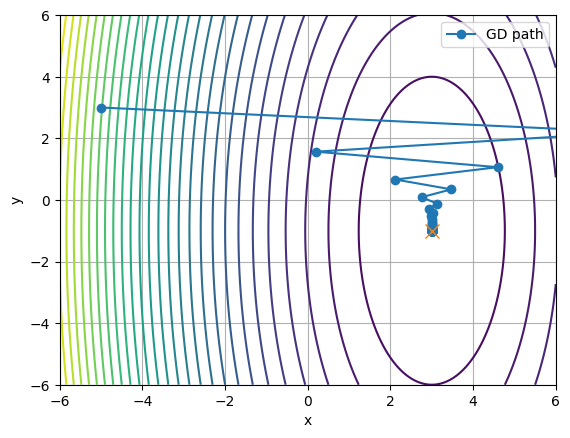

Method: GD cosine annealing
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -1.000)       0.000         161           161        1.000000  


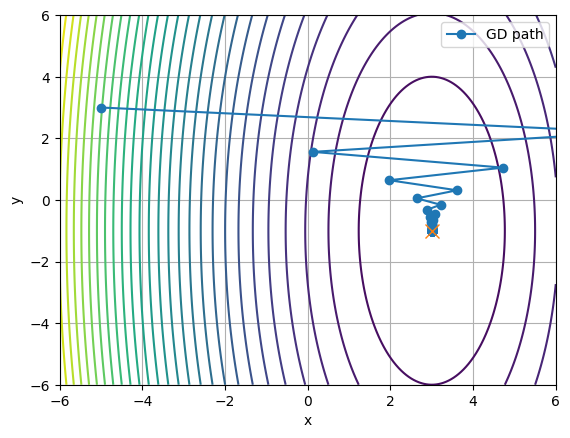

In [49]:
for decay in decay_modes:
    print_output([-5, 3],
                 lambda *args, **kwargs: gd_lrs(*args, learning_rate_schedule=decay[0], **kwargs),
                 func_es,
                 grad_es,
                 [3, -2],
                 decay[1])